In [161]:
# to use cd, etc
import sys
import os

import numpy as np
# for math work
from numpy import linalg, matlib
# save, import and load data
from numpy import asarray, save, load

# needed for some matrix manipulations
import cvxpy as cp
# import math 

import scipy
# for curve fitting
from scipy import optimize
from scipy.io import loadmat  # this is the SciPy module that loads mat-files

from sklearn.metrics import r2_score, mean_squared_error

import mat73
import pandas as pd

import matplotlib.pyplot as plt
# for plots
import seaborn
# set up seaborn for the plots
seaborn.set()

# suppress deprecation warnings
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# # # to save data plots
# from matplotlib.backends.backend_pdf import PdfPages

# from datetime import datetime
import pickle

### Set start and end days for session

In [2]:
sessStart = '072312'
sessEnd = '080412'

### Set up all paths

In [3]:
nDir = 'catNeuralDat_jeev' + sessStart + '_' + sessEnd + '_trE5_B100.mat'
kinDir = 'catBehaviorDat_jeev' + sessStart + '_' + sessEnd + '.mat' #catBehaviorDat_jeev072312_080412
decDir = 'decoderParams_jeev'+ sessStart + '_' + sessEnd + '.mat'
pathDir = '/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev' + sessStart + '_' + sessEnd
os.chdir(pathDir)
os.getcwd()

'/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev072312_080412'

In [4]:
nPath = pathDir + '/' + nDir
nDict = mat73.loadmat(nPath, use_attrdict=True)
nDict.keys()

dict_keys(['N_bmi', 'N_mc', 'N_norm_bmi', 'N_vfb', 'binvector', 'bmiDay', 'bmiDecoderInd', 'bmiDecoders', 'bmiSessions', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'day', 'days', 'mFRs', 'mcDay', 'mcSessions', 'params', 'sdFRs', 'sessID_bmi', 'sessID_mc', 'sessID_vfb', 'sessions', 'trEs_bmi', 'trEs_mc', 'trEs_vfb', 'trTs_bmi', 'trTs_mc', 'trTs_vfb', 'vfbDay', 'vfbSessions'])

### Loading kinematic (cursor) data

In [5]:
# kinPath = pathDir + '/' + kinDir
# kinPath

'/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev072312_080412/catBehaviorDat_jeev072312_080412.mat'

In [6]:
# kinPath = pathDir + '/' + kinDir
# kinDict = mat73.loadmat(kinPath, use_attrdict=True)
# kinDict.keys()

dict_keys(['EPM', 'MD_sd', 'MD_w', 'ME_sd', 'ME_w', 'MS_sd', 'MS_w', 'MV_sd', 'MV_w', 'P', 'Plower', 'Psd', 'Pupper', 'RT_sd', 'RT_w', 'bmiDay', 'bmiDecoderInd', 'bmiDecoders', 'bmiSessions', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'day', 'days', 'epmTime', 'kinSegs', 'maxD_sd', 'maxD_w', 'mcDay', 'mcSessions', 'params', 'params1', 'rotKinSegs', 'segE', 'segT', 'sessID', 'sessID_epm', 'sessID_kin', 'sessType', 'sessions', 'stats', 'trTime', 'tr_e', 'tr_t'])

### Loading Decoder Data

In [7]:
decPath = pathDir + '/' + decDir
decPath

'/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev072312_080412/decoderParams_jeev072312_080412.mat'

In [8]:
decPath = pathDir + '/' + decDir
decDict = mat73.loadmat(decPath, use_attrdict=True)
decDict.keys()

dict_keys(['H_MDp', 'H_MDv', 'H_PDp', 'H_PDv', 'Hs', 'K_MDp', 'K_MDv', 'K_PDp', 'K_PDv', 'Ks', 'Qs', 'bmiDay', 'bmiDecoderInd', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'sb', 'usedUnit_day', 'usedUnit_day_clean', 'usedUnit_decoder'])

### Sorting n_BMI to get time bin x decoder neurons x successful trials

#### Select Decoder Number

In [24]:
decNum = 2

#### Select time bins to care about

In [135]:
# time bins
alignCue = 20
endCue = len(nDict['binvector']) -1 

In [103]:
nDict['binvector']

array([-2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
       -2.22044605e-16,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
        1.20000000e+00,  1.30000000e+00,  1.40000000e+00,  1.50000000e+00,
        1.60000000e+00,  1.70000000e+00,  1.80000000e+00,  1.90000000e+00])

In [53]:
nDict['bmiDecoderInd']

array([1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 4., 5., 5., 5.,
       6., 7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 9.])

#### Find Units Used For this Decoder

In [97]:
# all units
decDict['bmiUnitInds_all']

array([ 51.,  86., 106., 141., 146., 216., 221., 226., 271., 301., 356.,
       396., 441., 521., 546., 591., 596., 611., 636.])

In [146]:
usedUnits = (decDict['bmiUnitInds_all'][decDict['usedUnit_decoder'][decNum]] - 1).astype(int)
usedUnits

array([ 50,  85, 105, 140, 215, 225, 270, 300, 395, 440, 520, 545, 590,
       595, 610, 635])

#### Find Successful Trials for that decoder in this series

In [147]:
# sessions that we care about
sessInd = np.where(nDict['bmiDecoderInd'] == decNum)[0] + 1
decTrials = np.where((nDict['sessID_bmi'] >= sessInd[0]) & (nDict['sessID_bmi'] <= sessInd[-1]))[0]
decTrials.shape

(2056,)

In [148]:
sessInd

array([ 4,  5,  6,  7,  8,  9, 10])

In [149]:
succCol = 6
dS = decTrials[0]
dE = decTrials[-1]
succIdx = (np.where((nDict['trEs_bmi'][dS:dE, succCol] == 8) | (nDict['trEs_bmi'][dS:dE, succCol] == 9))[0]) + dS

In [150]:
succIdx 

array([  41,   42,   43, ..., 2093, 2094, 2095])

In [151]:
nData_all = nDict['N_norm_bmi'][alignCue:endCue, usedUnits, :]
nData_all.shape

(19, 16, 9828)

In [152]:
nData_succ  = nData_all[:, :, succIdx]

In [153]:
nData_succ.shape

(19, 16, 2047)

Text(0, 0.5, 'Firing Rates (Hz)')

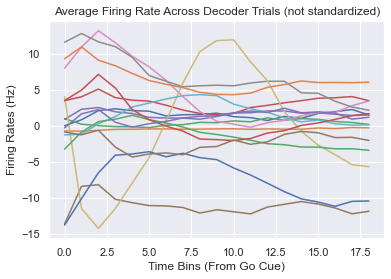

In [154]:
plt.plot(np.mean(nData_succ, 2));
plt.title("Average Firing Rate Across Decoder Trials (not standardized)")
plt.xlabel("Time Bins (From Go Cue)")
plt.ylabel("Firing Rates (Hz)")

### Saving Data

In [164]:
# date = datetime.today().strftime('%Y_%m_%d')
savepath = '/Users/mmadduri/Documents/PhD/ResearchMaterials/Code/BMI_Model/data/' + 'jeev' + sessStart + '_' + sessEnd + '/'
# savepath

try:
    os.makedirs(savepath) # create directory [current_path]/feed/address
except OSError:
    pass # already exists

In [166]:
data = [decNum, usedUnits, succIdx, nData_succ]
with open(savepath + 'decoder_' + str(decNum) + '_neuralData.pkl', 'wb') as outfile:
    pickle.dump(data, outfile, pickle.HIGHEST_PROTOCOL)